<h2> Demo: Implementing Linear Discriminant Analysis </h2>

In this demo, you will be shown how to implement LDA using Python.

### Step 1: Import required libraries

In [3]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams['font.size']=14
plt.rcParams['lines.markersize']=10

### Step 2: Load iris.csv file 

In [4]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']  
dataset = pd.read_csv('iris.csv', names=names)  
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = dataset.iloc[:, 0:4].values  
y = dataset.Class.map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3 }).values

The above code assigns the first four columns of the dataset i.e. the feature set to X variable while the values in the fifth column (labels) are assigned to the y variable.

In [6]:
#Training & testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

### Step 3: Perform feature scaling 

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

### Step 4: Perfom LDA

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)  
X_train = lda.fit_transform(X_train, y_train)  
X_test = lda.transform(X_test)  

LinearDiscriminantAnalysis class is imported as LDA. Like PCA, we have to pass the value for the n_components parameter of the LDA, which refers to the number of linear discriminates that we want to retrieve. In this case we set the n_components to 1, since we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.

Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. However in the case of PCA, the transform method only requires one parameter i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.

### Step 5: Plot the graph

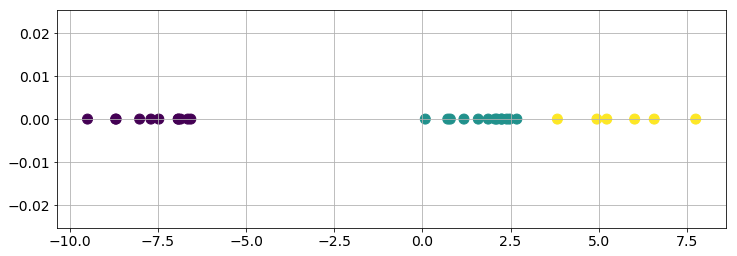

In [9]:
plt.figure(figsize=(12,4))
plt.scatter(X_test, np.zeros(len(X_test)), c=y_test)
plt.grid()
plt.show()

### Step 6: Training & Testing the data

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

C:\Users\KishoreKumar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Step 7: Evaluate the model

In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))  

Accuracy: 1.0


# PCA vs LDA: What to Choose for Dimensionality Reduction?
In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

Finally, it is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data.

## Additional Areas of Exploration:

### Other Techniques:
* #### Backward/Forward Feature Elimination (both categorical and numerical). Computationally and time expensive
* #### Backward - from sklearn.feature_selection import RFE

### Techniques for Dimensionality reduction for categorical Features:
* #### Hierarchial Comoponent Analysis (HCA)
* #### Categorical principal component analysis (CATPCA)
* #### Multiple Correspondence Analysis (MCA)
